# ДЗ №7

In [181]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## Данные HEART DISEASE 

In [189]:
df = pd.read_csv('heart_disease_data.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.30,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.50,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.60,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.50,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.40,1,0,3,0


In [190]:
y = df['pred_attribute'].as_matrix()
y_colors = [None] * len(y)

for i in range(len(y_colors)):
    if(y[i]==0):
        y_colors[i] = 'b'
    if(y[i]==1):
        y_colors[i] = 'g'
    if(y[i]==2):
        y_colors[i] = 'r'
    if(y[i]==3):
        y_colors[i] = 'y'
    if(y[i]==4):
        y_colors[i] = 'k'
y_colors = np.asarray(y_colors)

scaler = MinMaxScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
X = df.drop(['pred_attribute'], axis=1).as_matrix()

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# 8 компонент компонент объясняют 90% данных

In [191]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

8

## Explained Variance

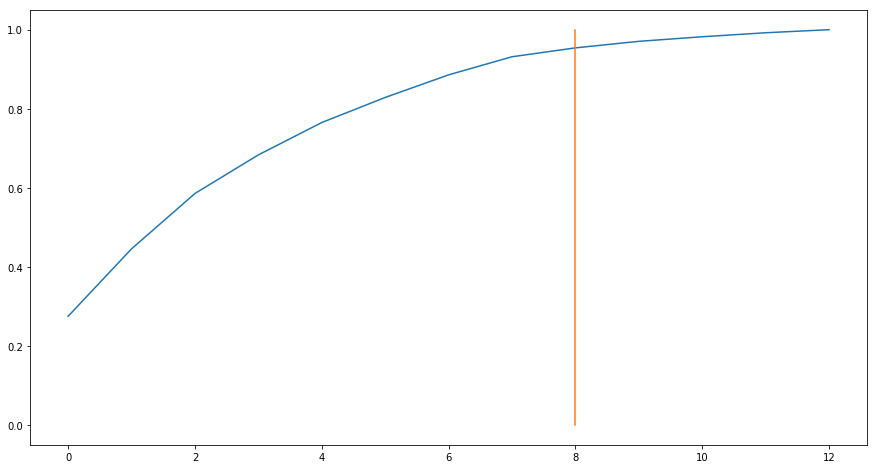

In [192]:
plt.plot(cumsum)
plt.plot([d, d], [0, 1])

# Из 2х главных компонент здоровые люди(синии точки) разделяются от больных людей. 

In [193]:
pca.explained_variance_ratio_

array([0.27508971, 0.17053755, 0.14003634, 0.09762063, 0.08186751,
       0.06339657, 0.05716147, 0.04580979, 0.02248483, 0.01654367,
       0.01159099, 0.01010159, 0.00775934])

In [194]:
x_new = PCA(n_components=2).fit_transform(X)

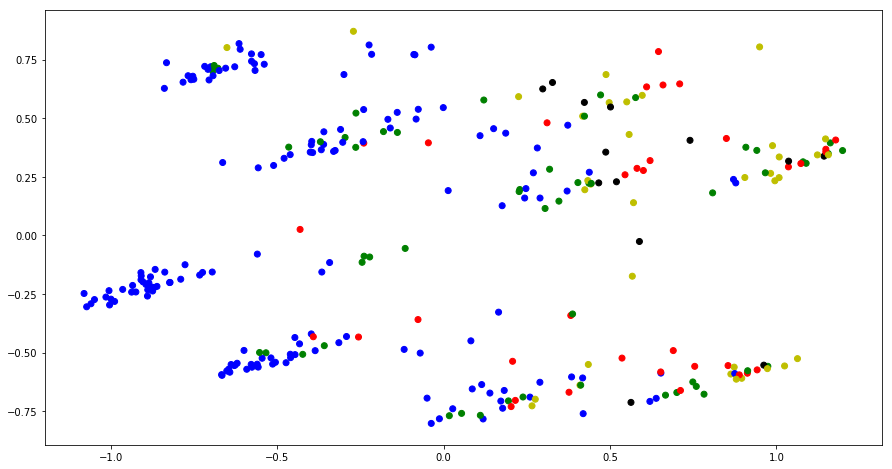

In [195]:
plt.scatter(x_new[:, 0], x_new[:, 1], c = y_colors)

# Из 3х компонент это уже более отчетливо видно

In [196]:
x_new = PCA(n_components=3).fit_transform(X)

<IPython.core.display.Javascript object>


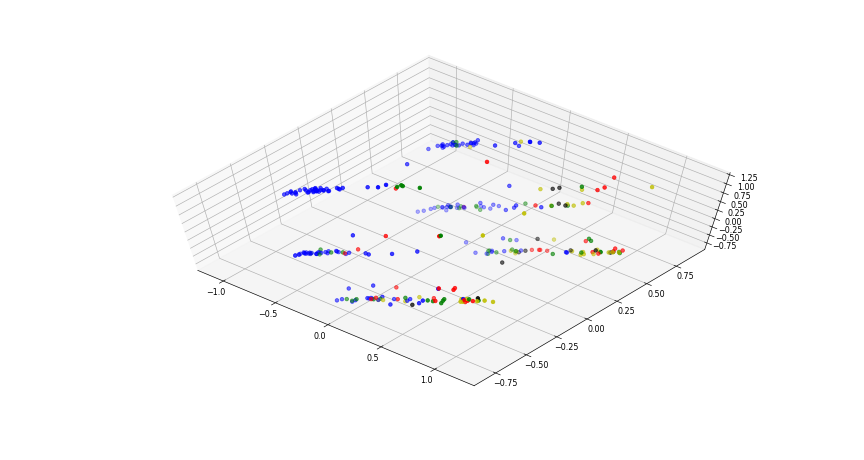

In [197]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2] )
ax.scatter(x_new[:,0], x_new[:,1], x_new[:,2], c=y_colors)

## Возьмем только самые важные 8 компонент.

In [198]:
X_data=df.drop(['pred_attribute'], axis=1)
pca_8 = PCA(n_components=8)
pca_8.fit(X_data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Выведем значение компонент для каждого признака


In [199]:
print(pd.DataFrame(pca_8.components_,columns=X_data.columns, index = ['PC-1','PC-2','PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8'  ]))

       age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
PC-1  0.06  0.40  0.22      0.04  0.00  0.05     0.19    -0.12   0.50   
PC-2  0.08 -0.29  0.05      0.06  0.05  0.07     0.91    -0.03   0.05   
PC-3  0.06 -0.68  0.28      0.01  0.04 -0.11    -0.31    -0.11   0.54   
PC-4  0.16 -0.39 -0.02      0.11  0.04  0.48    -0.10    -0.04  -0.48   
PC-5  0.03  0.18 -0.12      0.04 -0.01  0.80    -0.12     0.01   0.35   
PC-6 -0.11 -0.10 -0.50      0.07 -0.03  0.12     0.03     0.03   0.11   
PC-7  0.13  0.24 -0.00     -0.02 -0.04 -0.15    -0.13    -0.18  -0.14   
PC-8  0.16 -0.09 -0.76      0.10  0.05 -0.25    -0.01     0.02   0.24   

      oldpeak  slop    ca  thal  
PC-1     0.14  0.20  0.19  0.62  
PC-2     0.03  0.09  0.08 -0.23  
PC-3     0.07  0.14  0.03 -0.09  
PC-4     0.10  0.17  0.32  0.44  
PC-5    -0.06 -0.11  0.09 -0.38  
PC-6     0.11  0.50 -0.63  0.15  
PC-7     0.30  0.66  0.35 -0.43  
PC-8     0.02 -0.20  0.46  0.07  


# TSNE 2D для разных значений perplexity от 5 до 200


## TSNE 2D такжа показывает визуально разделение здоро

In [201]:
tsnelist2d = []
for i in range(10, 200, 10):
    tsnelist2d.append(TSNE(n_components=2, random_state=42, perplexity=i))

In [202]:
X_reduced_list2d = []

for i in range(0, len(tsnelist2d), 1):
    X_reduced_list2d.append(tsnelist2d[i].fit_transform(X))

<IPython.core.display.Javascript object>


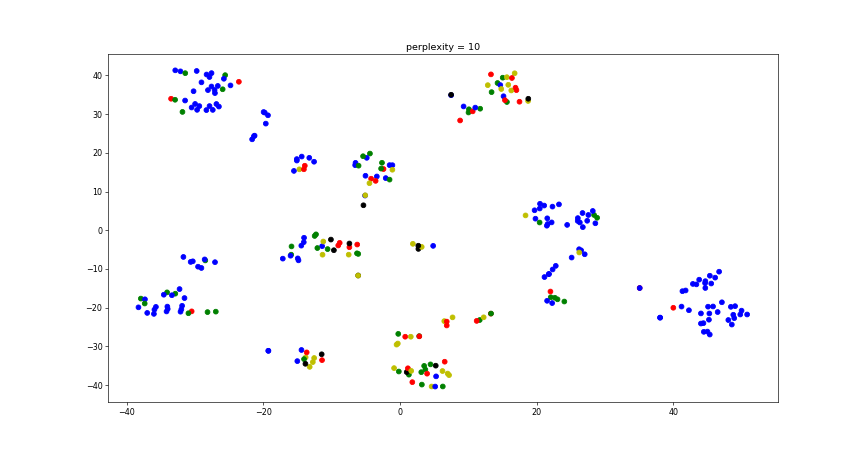

<IPython.core.display.Javascript object>


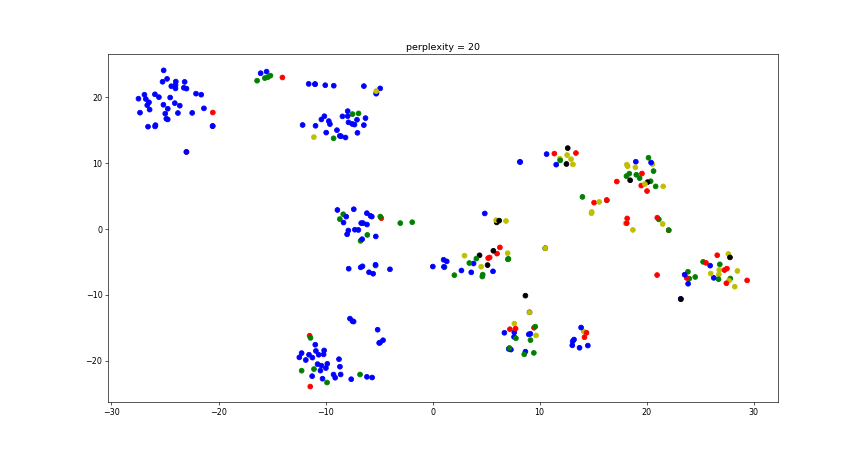

<IPython.core.display.Javascript object>


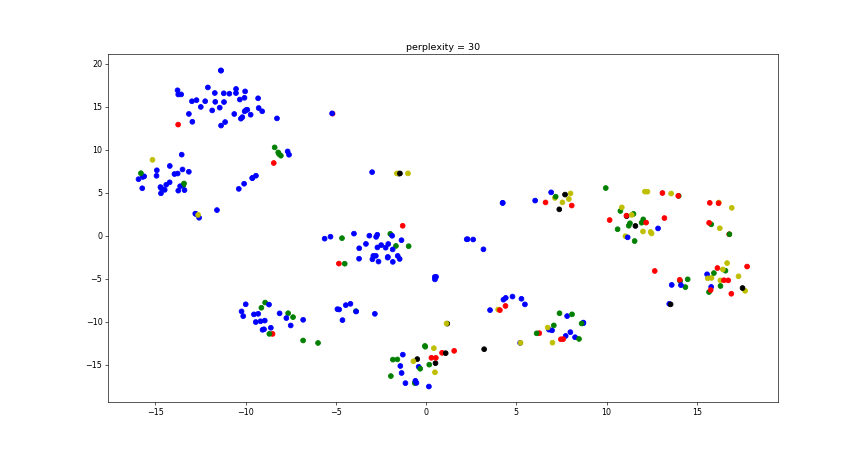

<IPython.core.display.Javascript object>


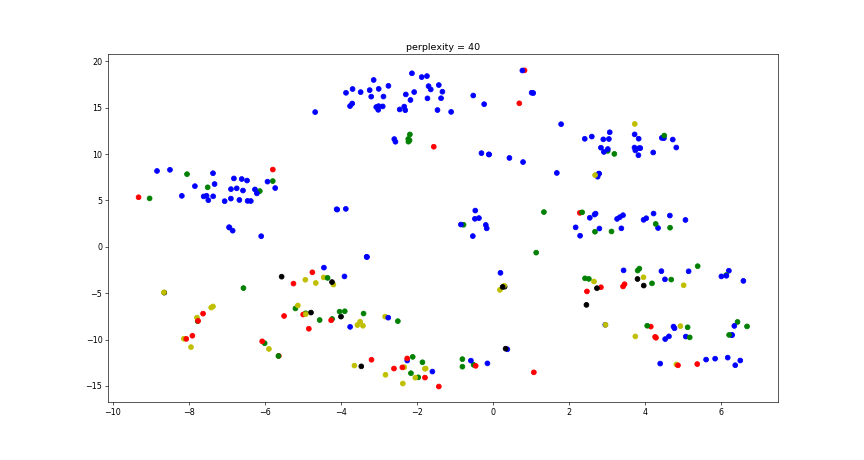

<IPython.core.display.Javascript object>


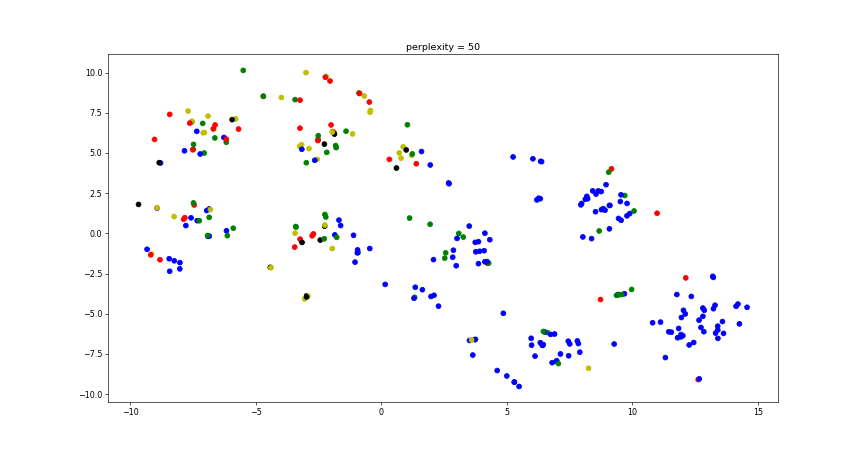

<IPython.core.display.Javascript object>


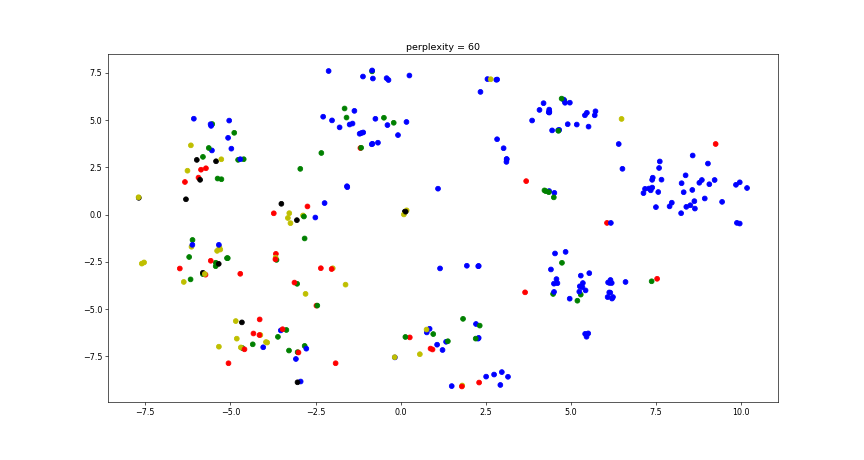

<IPython.core.display.Javascript object>


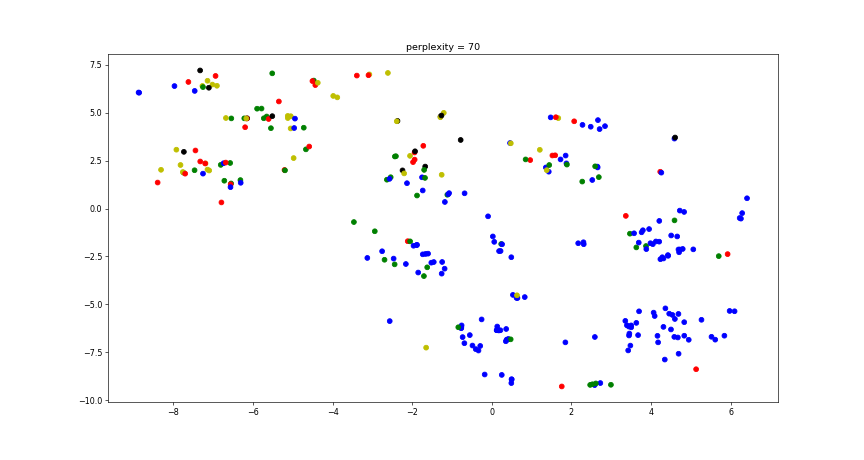

<IPython.core.display.Javascript object>


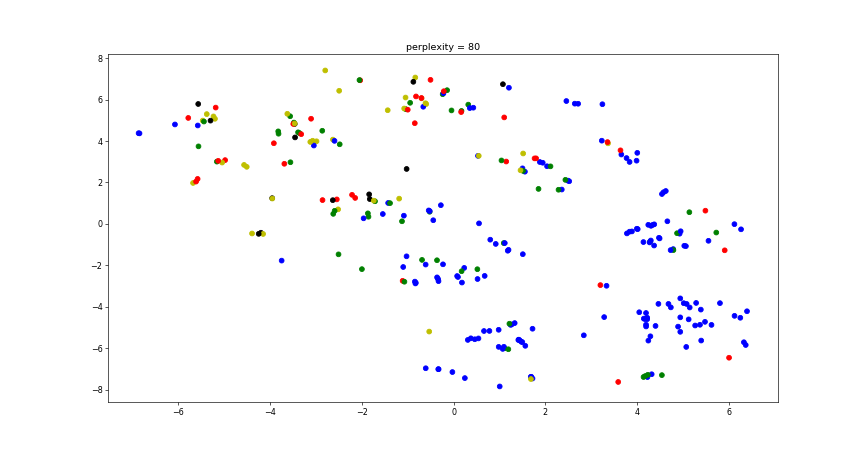

<IPython.core.display.Javascript object>


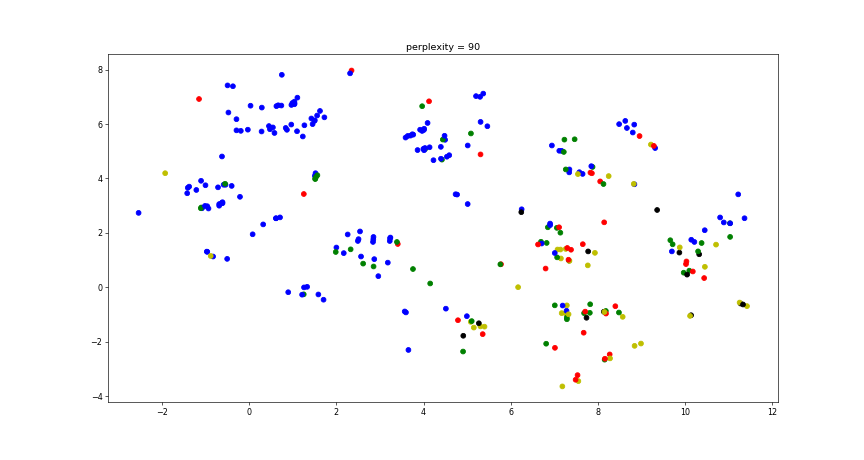

<IPython.core.display.Javascript object>


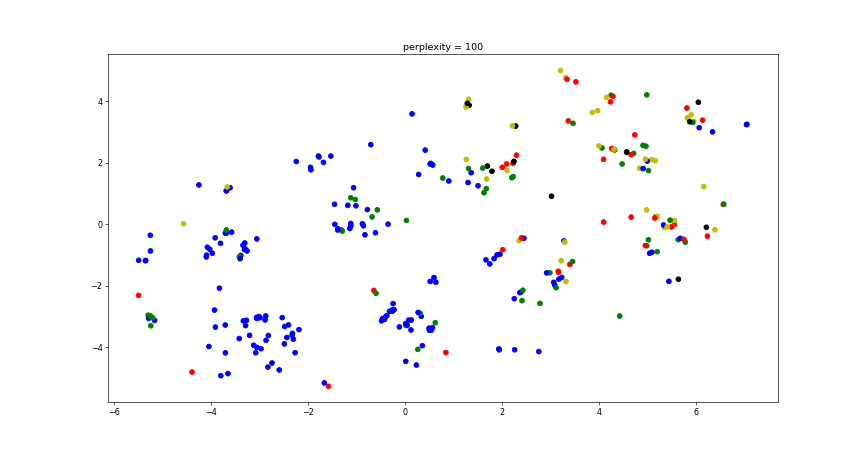

<IPython.core.display.Javascript object>


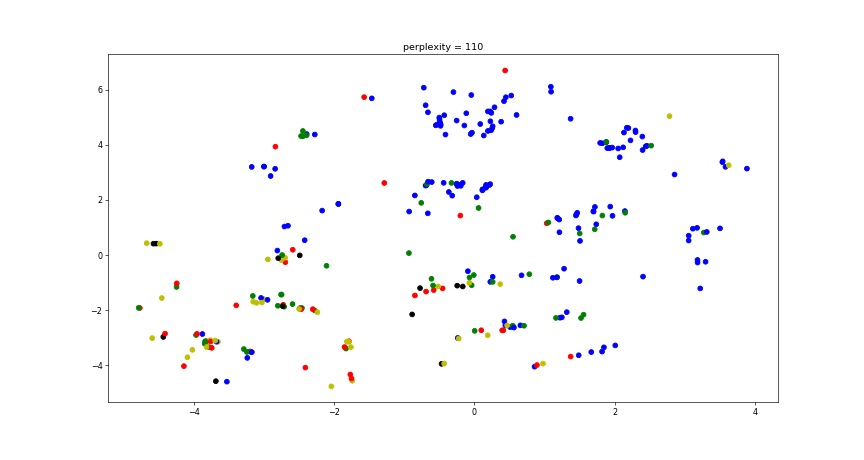

<IPython.core.display.Javascript object>


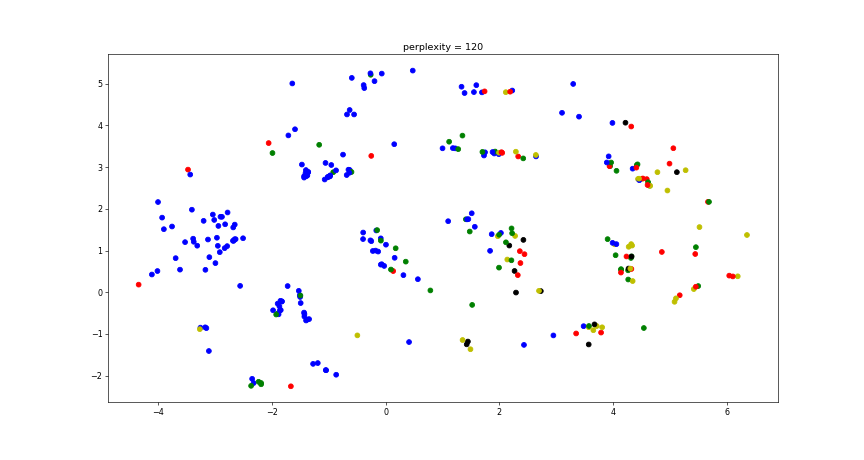

<IPython.core.display.Javascript object>


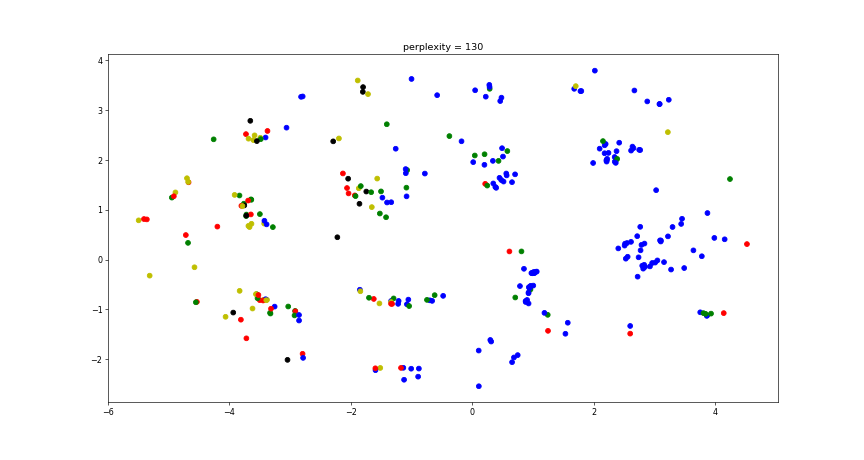

<IPython.core.display.Javascript object>


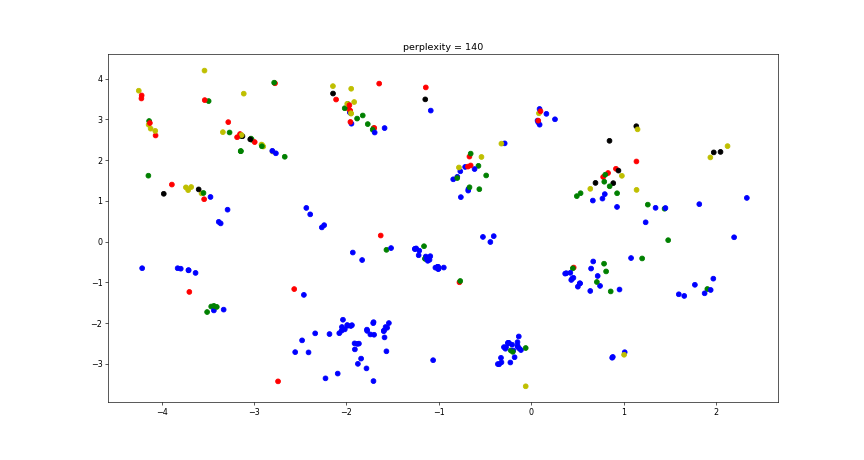

<IPython.core.display.Javascript object>


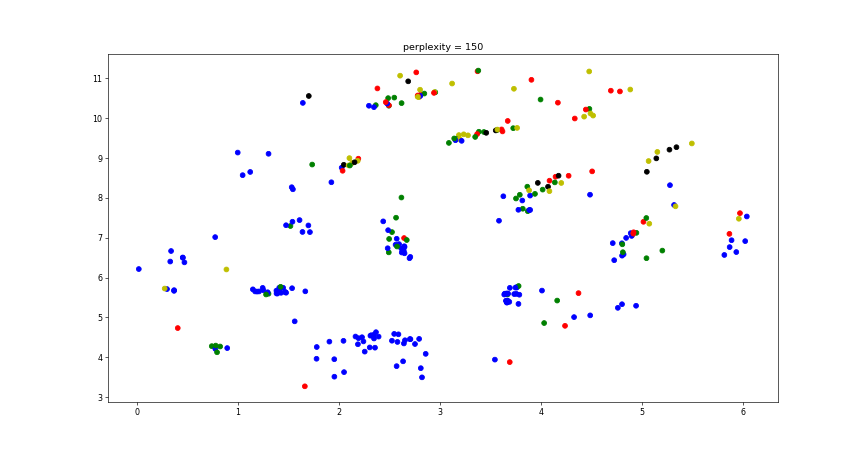

<IPython.core.display.Javascript object>


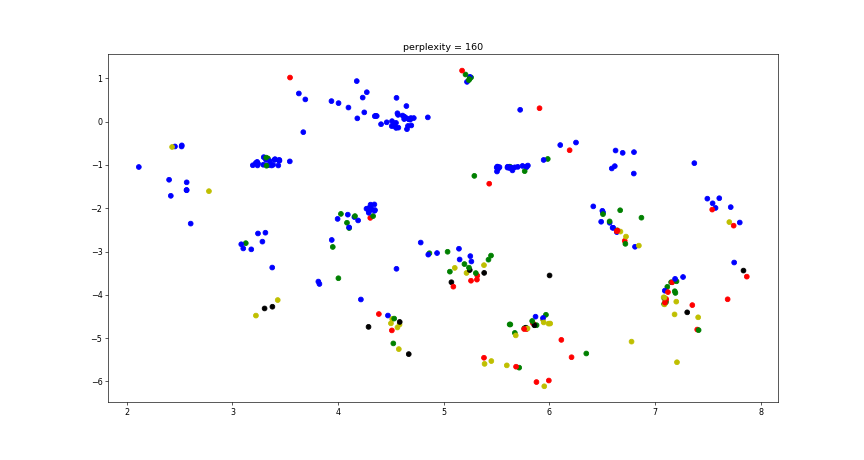

<IPython.core.display.Javascript object>


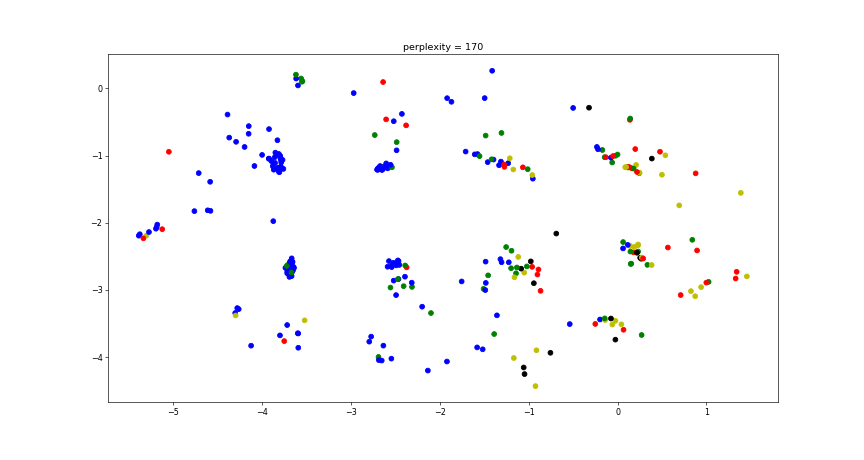

<IPython.core.display.Javascript object>


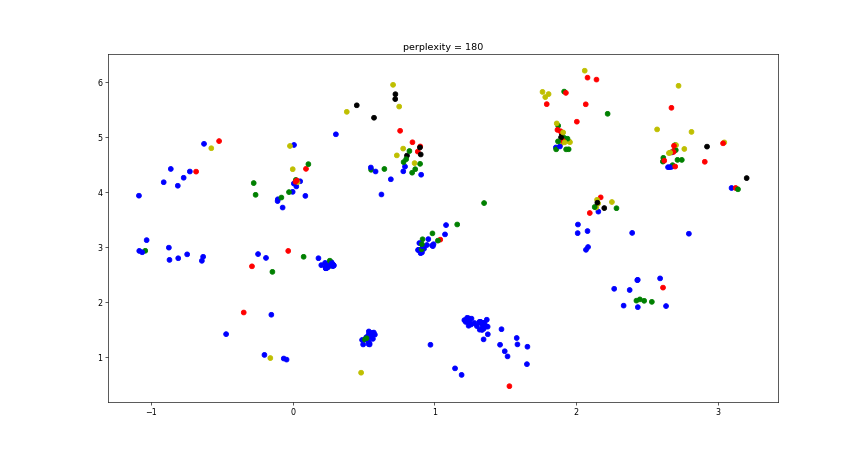

<IPython.core.display.Javascript object>


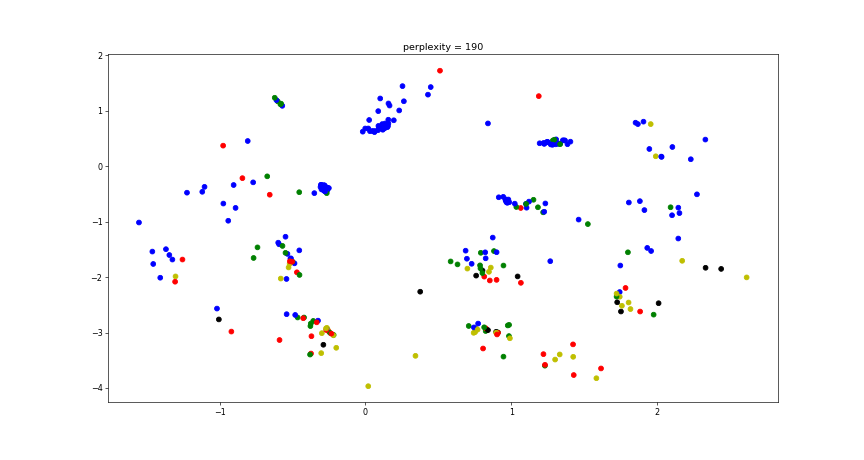

In [203]:
for i in range(0,len(tsnelist2d), 1):
    plt.figure(i)
    plt.scatter(X_reduced_list2d[i][:, 0], X_reduced_list2d[i][:, 1], c=y_colors)
    plt.title('perplexity = '+ str(10+10*i))

# LinearDiscriminantAnalysis  - также показывает разделение здоровых пациентов

# 2D LDA

In [165]:
lda = LDA(n_components=2, solver='svd') #2-dimensional LDA svd eigen
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

In [166]:
lda_transformed.shape

(297, 2)

<IPython.core.display.Javascript object>


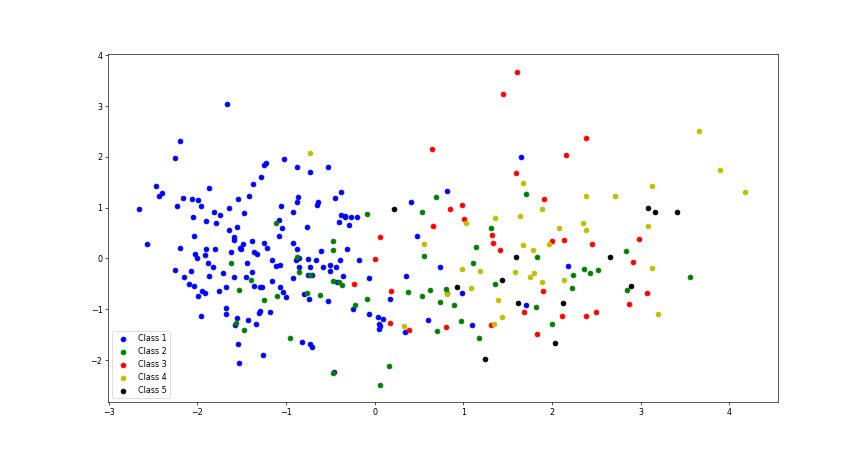

In [167]:
# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='b')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='g')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='r')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 4', c='y')
plt.scatter(lda_transformed[y==4][0], lda_transformed[y==4][1], label='Class 5', c='k')
# Display legend and show plot
plt.legend(loc=3)
plt.show()
        

# 3D LDA

In [168]:
lda = LDA(n_components=3, solver='svd') #2-dimensional LDA svd eigen
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

In [169]:
lda_transformed.shape

(297, 3)

<IPython.core.display.Javascript object>


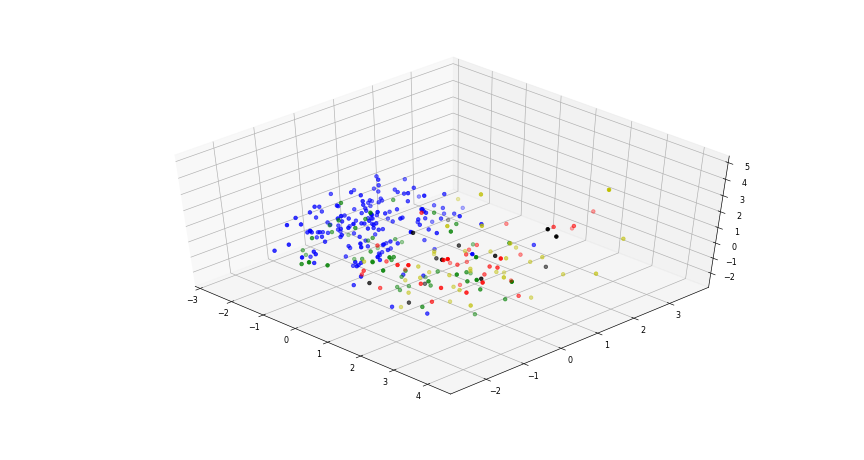

In [171]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2] )
#ax.scatter(lda_transformed[:,0], lda_transformed[:,1], lda_transformed[:,2], c=y_colors)
ax.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], lda_transformed[y==0][2], label='Class 1', c='b')
ax.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1],lda_transformed[y==1][2], label='Class 2', c='g')
ax.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1],lda_transformed[y==2][2], label='Class 3', c='r')
ax.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1],lda_transformed[y==3][2], label='Class 4', c='y')
ax.scatter(lda_transformed[y==4][0], lda_transformed[y==4][1],lda_transformed[y==4][2], label='Class 5', c='k')



# Модели

## LogisticRegression

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [177]:
clf_lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
scores = cross_val_score(clf_lr, X, y, cv=5)

In [178]:
scores.mean()

0.599333722969024

## RandomForestClassifier

In [179]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
scores = cross_val_score(clf_rf, X, y, cv=5)

In [180]:
scores.mean()

0.565431521527372